### El caso más sencillo
Tomaremos el caso para una función f(x) con una sóla variable real.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#definimos la función y su derivada

f=lambda x: x**2
df=lambda x: 2*x

#esta función parece tener un mínimo cerca de 5, trabajaremos en el intervalo [2.5,7.5]
#Tomamos un paso eta=0.2 y un valor inicial x en el intervalo


def grad(f,df):
    i=0
    A=np.arange(-5,6,0.05)
    eta=0.2
    x=np.random.choice(A,1)
    #para visualizar los pasos guardamos los [x,f(x)] en un arreglo
    X=[x]
    Y=[f(x)]
    #Hacemos las iteraciones hasta que f'(x)<10^-6
    while True:
        i=i+1
        x=x-0.2*df(x)
        df(x)
        X.append(x)
        Y.append(f(x))
        if f(x)<10e-5 or i>30: break
    plt.plot(X,Y,'o-b', label='Descenso del gradiente')
    plt.plot(A,[f(y) for y in A],'r',label='Función original')
    plt.grid()
    plt.legend()
    print('El valor óptimo para f es %.2f' %x)



El valor óptimo para f es 0.01


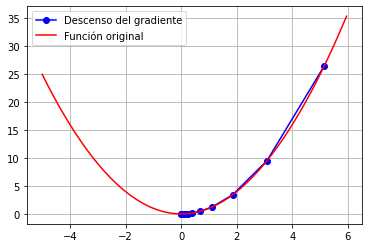

In [3]:
grad(f,df)

### Multivariables
Vamos a definir Descenso del gradiente para una función de varias variables.
Tomaremos $$f(x_1,x_2)=x_1^2+2x_2^2$$

In [293]:
#definimos la función 
def h(X):
    return X[0]**2 + 2*X[1]**2
def gradh(X):
    dh=np.array([2*X[0],4*X[1]])
    return dh
#hacemos las iteraciones
def desgrad(f,df):
    i=0
    A=np.arange(-10,10)
    B=np.arange(-10,10)
    #tomamos un (x,y) aleatorio para empezar el proceso
    X0=[6,7]
    u,v=[X0[0]],[X0[1]]
    #Hacemos las iteraciones
    while True:
        i=i+1
        X0=X0-0.1*gradh(X0)
        u.append(X0[0])
        v.append(X0[1])
        if np.linalg.norm(gradh(X0))<1e-5 or i>30: break
    #Visualizamos el proceso
    X,Y=np.meshgrid(A,B)
    Z=X**2+2*Y**2
    plt.contour(X,Y,Z,cmap='viridis')
    plt.plot(u,v,'ro-')
    print("El X óptimo para f es:")
    print(round(X0[0]),round(X0[1]))


El X óptimo para f es:
0.0 0.0


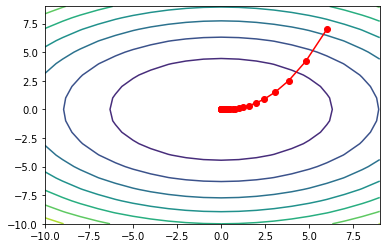

In [294]:
desgrad(f,df)

# Caso más general
Definiremos el Descenso del Gradiente para una función $$f:R^n------->R$$ Sin la necesidad de escribir su gradiente de manera explícita, con 
$$descenso_grad(f,X0,\eta)$$
Con f la función a optimizar, X0 el punto desde el cual se va a iniciar y $\eta$ la taza de aprendizaje

In [313]:
def descenso_grad(f,X0,eta):
   
    #definimos las derivadas parciales de una función de R^n a R
    #si X=(x1,x2,...,xk,...xn), debemos indicar con k respecto a cuál variable derivar
    def partial(g,k,X):
        h=1e-9
        Y=np.copy(X)
        X[k-1]=X[k-1]+h
        dp=(g(X)-g(Y))/h
        return dp
    #Ahora definimos la función que nos dará el gradiente
    def grad(f,X):
        grd=[]
        for i in np.arange(0,len(X)):
            ai=partial(f,i,X)
            grd.append(ai)
        return grd
    #Ahora se hacen las iteraciones
    #el valor inicial de x lo definimos en X0=[1,1,....1]
    #¿Es necesario guardar los datos intermedios [X0,f(X0)]?
    i=0
    print(eta*np.array(grad(f,X0)))
    while True:
        i=i+1
        X0=X0-eta*np.array(grad(f,X0))
        print(X0)
        if np.linalg.norm(grad(f,X0))<10e-8 or i>30: break
    return X0
    
        
    

In [320]:
def s(X):
    return X[0]**2 + X[1]**2 + X[2]**2
descenso_grad(s,[6,7,4],0.001)

[0.008      0.012      0.01400001]
[5.992      6.98800002 3.98599999]
[5.984028   6.97601603 3.97202399]
[5.97608395 6.96404798 3.95807196]
[5.96816781 6.95209583 3.94414386]
[5.96027952 6.94015949 3.93023966]
[5.95241904 6.92823893 3.91635935]
[5.94458634 6.91633409 3.90250288]
[5.93678134 6.90444492 3.8886702 ]
[5.92900399 6.89257136 3.87486132]
[5.92125426 6.88071335 3.86107618]
[5.91353212 6.86887084 3.84731476]
[5.90583748 6.85704377 3.83357702]
[5.89817033 6.84523209 3.81986292]
[5.8905306  6.83343578 3.80617244]
[5.88291825 6.82165471 3.79250556]
[5.87533323 6.80988889 3.77886224]
[5.86777552 6.79813822 3.76524247]
[5.86024503 6.78640268 3.75164621]
[5.85274175 6.77468218 3.73807341]
[5.84526559 6.7629767  3.72452404]
[5.83781655 6.75128617 3.71099808]
[5.83039454 6.73961053 3.69749553]
[5.82299956 6.72794975 3.68401631]
[5.81563153 6.71630375 3.6705604 ]
[5.8082904  6.7046725  3.65712779]
[5.80097615 6.69305592 3.64371845]
[5.79368871 6.68145397 3.63033234]
[5.78642805 6.669866

array([5.76480623, 6.63519138, 3.57701963])